In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
%matplotlib inline

In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
# Add 'overweight' column

In [4]:
bmi = df['weight'] / (df['height'] / 100) ** 2

In [5]:
df['bmi'] = bmi

In [6]:
overweight_true_filter = bmi > 25

In [7]:
overweight_false_filter = bmi <= 25

In [8]:
df['overweight'] = None

In [9]:
df.loc[overweight_true_filter, 'overweight'] = 1

In [10]:
df.loc[overweight_false_filter, 'overweight'] = 0

In [11]:
# Normalize data by making 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
# If the value is more than 1, make the value 1.

In [12]:
df.loc[:, 'cholesterol'] = df['cholesterol'].map({1: 0, 2: 1, 3: 1})

In [13]:
df['cholesterol'].value_counts(normalize=True)

0    0.748357
1    0.251643
Name: cholesterol, dtype: float64

In [14]:
df.loc[:, 'gluc'].replace({1: 0, 2: 1, 3: 1}, inplace=True)

In [15]:
# FIGURE 1

In [16]:
subjective_features = ['smoke', 'alco', 'active']

In [17]:
examination_features = ['cholesterol', 'gluc', 'overweight']

In [18]:
target = 'cardio'

In [19]:
# Draw Categorical Plot
def draw_cat_plot():
    
    # Create DataFrame for cat plot using `pd.melt` using just the values 
    # from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = None


    # Group and reformat the data to split it by 'cardio'. 
    # Show the counts of each feature. 
    # You will have to rename one of the collumns for the catplot to work correctly.
    df_cat = None

    # Draw the catplot with 'sns.catplot()'



    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

In [20]:
features = df.loc[:, subjective_features + examination_features + [target]]
features

,smoke,alco,active,cholesterol,gluc,overweight,cardio
0,0,0,1,0,0,0,0
1,0,0,1,1,0,1,1
2,0,0,0,1,0,0,1
3,0,0,1,0,0,1,1
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
69995,1,0,1,0,0,1,0
69996,0,0,1,1,1,1,1
69997,0,1,0,1,0,1,1
69998,0,0,0,0,1,1,1


```filt = features.cardio == 0
zero = features.loc[filt, :]
zero
```

## Group by 'cardio'

In [22]:
cardio_gr = features.groupby(['cardio'])
cardio_gr

In [25]:
cardio_0 = cardio_gr.get_group(0)
cardio_0

,smoke,alco,active,cholesterol,gluc,overweight,cardio
0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,1,1,1,0
6,0,0,1,1,0,1,0
8,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...
69987,0,0,1,0,0,0,0
69988,0,0,1,0,0,0,0
69991,0,0,1,1,1,1,0
69995,1,0,1,0,0,1,0


In [28]:
cardio_1 = cardio_gr.get_group(1)
cardio_1

,smoke,alco,active,cholesterol,gluc,overweight,cardio
1,0,0,1,1,0,1,1
2,0,0,0,1,0,0,1
3,0,0,1,0,0,1,1
7,0,0,1,1,1,1,1
15,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...
69993,0,0,1,0,0,0,1
69994,0,0,1,0,0,1,1
69996,0,0,1,1,1,1,1
69997,0,1,0,1,0,1,1


## Melt

In [31]:
melt_0 = pd.melt(cardio_0.drop(columns=['cardio']))
melt_0

,variable,value
0,smoke,0
1,smoke,0
2,smoke,0
3,smoke,0
4,smoke,0
...,...,...
210121,overweight,0
210122,overweight,0
210123,overweight,1
210124,overweight,1


In [32]:
melt_1 = pd.melt(cardio_1.drop(columns=['cardio']))
melt_1

,variable,value
0,smoke,0
1,smoke,0
2,smoke,0
3,smoke,0
4,smoke,0
...,...,...
209869,overweight,0
209870,overweight,1
209871,overweight,1
209872,overweight,1


## Aggregation

**group by variable applying count (value count)  
or  
group by variable and value**

In [52]:
agg_0 = melt_0.groupby(['variable', 'value'])
agg_0

In [57]:
agg_0.agg(pd.Series.mean)

value
variable    value       
active      0        0.0
            1        1.0
alco        0        0.0
            1        1.0
cholesterol 0        0.0
            1        1.0
gluc        0        0.0
            1        1.0
overweight  0        0.0
            1        1.0
smoke       0        0.0
            1        1.0

In [60]:
agg_0.agg(len)

variable     value
active       0         6378
             1        28643
alco         0        33080
             1         1941
cholesterol  0        29330
             1         5691
gluc         0        30894
             1         4127
overweight   0        15915
             1        19106
smoke        0        31781
             1         3240
dtype: int64

<AxesSubplot:xlabel='variable,value'>

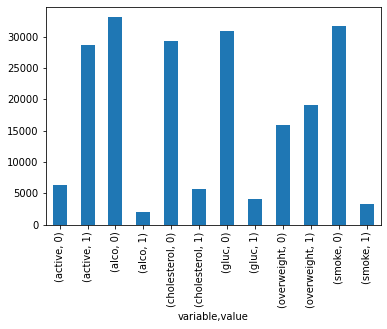

In [66]:
data_fig1 = agg_0.agg(len)
data_fig1.plot(kind='bar')

In [41]:
agg_0 = melt_0.groupby('variable')
agg_0

In [72]:
agg_0.agg(len)

variable     value
active       0         6378
             1        28643
alco         0        33080
             1         1941
cholesterol  0        29330
             1         5691
gluc         0        30894
             1         4127
overweight   0        15915
             1        19106
smoke        0        31781
             1         3240
dtype: int64

In [ ]:
melt_groups_0 = melt_0.groupby(['variable'])
melt_groups_0

In [ ]:
melt_groups_0.get_group('smoke')

In [ ]:
x = melt_groups_0.get_group('smoke')['value'].value_counts()
x

In [ ]:
melt_groups_0.count()

In [ ]:
sns.catplot(data=x)

In [ ]:
df_cat = pd.melt(subj_exam_features)
df_cat

In [ ]:
fs = df_cat['variable'] == 'smoke'
fs

In [ ]:
df_cat.loc[fs]

In [ ]:
a = [[10,20,30], [10,50,44], [90,20,80]]

In [ ]:
b = ['v1', 'v2', 'v3']

In [ ]:
d = dict(zip(b, a))
d

In [ ]:
dff = pd.DataFrame(d)
dff

In [ ]:
# sns.catplot(a, b)